# 2010 Baja CA EQ, QTM Catalog Mapping: Density Grid Test Points, β-statistic, complete 60 days
4/8 for Magnitude of Completeness: M > 0.3


In [78]:
# IMPORT CELL; updated 2/11/21

import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore') 
from importlib import reload
import time
import math
import scipy.stats as stats

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

import obspy
from obspy.core import UTCDateTime
from obspy import read

import obspy.geodetics as gd # Imported whole file
#from obspy.geodetics import locations2degrees # calc_dist() alike?
#from obspy.taup.taup_geo import calc_dist # calc_dist()

import cartopy
import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker

print("Imported! ")

Imported! 


In [79]:
%%time
QTM_Range = pd.read_pickle("QTM_Range.pkl")
QTM_Range = QTM_Range.loc[QTM_Range["MAGNITUDE"]>= 0.3]

Wall time: 804 ms


In [80]:
# Set mean latitudes and longitudes
MeanLat = QTM_Range["LATITUDE"].mean()
MeanLon = QTM_Range["LONGITUDE"].mean() 

# Define two more datasets of 30 days before and 30 days after Baja EQ
QTM_TEMP = QTM_Range.loc[QTM_Range["EVENTID"] == ""] # Get Baja EQ
QTM_TEMP = QTM_TEMP.iloc[0]
BajaTimestamp = float(QTM_TEMP["TIMESTAMP"])
BajaTimestamp

1270420842.0

In [81]:
Faults = pd.read_csv("cafaults.xy", sep = "[\s]", names = ["LONGITUDE", "LATITUDE"])
# Read in fault traces
Faults

FaultsIndices = list(Faults.loc[Faults["LONGITUDE"] == ">"].index)
#FaultsIndices

In [82]:
GridPoints = pd.read_csv("Maps/Density Grid/GridPoints.csv")

## β-statistic (3/4)
All points

In [83]:
%%time
Point1 = pd.DataFrame({"LATITUDE" : [32.7], "LONGITUDE" : [-115.8]})
Dists1_Deg = gd.locations2degrees(Point1.LATITUDE, Point1.LONGITUDE, 
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
Point1Data = QTM_Range.copy(deep = True)
Point1Data["DEGDIST"] = Dists1_Deg
Point1Data_Deg = Point1Data.loc[Point1Data["DEGDIST"] <= 0.1]

Point2 = pd.DataFrame({"LATITUDE" : [32.6585], "LONGITUDE" : [-115.8862]})
Dists2_Deg = gd.locations2degrees(Point2.LATITUDE, Point2.LONGITUDE, 
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
Point2Data = QTM_Range.copy(deep = True)
Point2Data["DEGDIST"] = Dists2_Deg
Point2Data_Deg = Point2Data.loc[Point2Data["DEGDIST"] <= 0.1]

Point3 = pd.DataFrame({"LATITUDE" : [33.5059], "LONGITUDE" : [-116.4916]})
Dists3_Deg = gd.locations2degrees(Point3.LATITUDE, Point3.LONGITUDE, 
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
Point3Data = QTM_Range.copy(deep = True)
Point3Data["DEGDIST"] = Dists3_Deg
Point3Data_Deg = Point3Data.loc[Point3Data["DEGDIST"] <= 0.1]

Point4 = pd.DataFrame({"LATITUDE" : [33.163333], "LONGITUDE" : [-115.616667]})
Dists4_Deg = gd.locations2degrees(Point4.LATITUDE, Point4.LONGITUDE, 
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
Point4Data = QTM_Range.copy(deep = True)
Point4Data["DEGDIST"] = Dists4_Deg
Point4Data_Deg = Point4Data.loc[Point4Data["DEGDIST"] <= 0.1]

Point5 = pd.DataFrame({"LATITUDE" : [32.5], "LONGITUDE" : [-116.5]})
Dists5_Deg = gd.locations2degrees(Point5.LATITUDE, Point5.LONGITUDE,
                                 QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
Point5Data = QTM_Range.copy(deep = True)
Point5Data["DEGDIST"] = Dists5_Deg
Point5Data_Deg = Point5Data.loc[Point5Data["DEGDIST"] <= 0.1]

Wall time: 178 ms


### β = (Na - Λ)/√Λ
### Λ = Nb * Δta/Δtb
beta = Na - lambda/sqrt(lambda)

lambda = Nb * delta time,a / delta time,b

Na = number of events during time period of interest delta time,a

Nb = total reference number of events during total reference time period delta time,b

#### Point 1

In [84]:
len(Point1Data_Deg)

33071

In [85]:
# Calculate β-statistics in sequence of timeframes: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d
TimeframeSeq = [-24*30,-24*20,-24*10,-24*7,-24,-12,-2,2,12,24,24*7,24*10,24*20,24*30]
TimeframeSeq
Point1BetasDF = pd.DataFrame(columns = ["BetaStat", "Timeframe (hours around)", "Cumulative Events"])
Nb = len(Point1Data_Deg)
for i in TimeframeSeq:
    QTM_Temp = Point1Data_Deg.copy(deep = True)
    if i < 0:
        QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp]
        QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp - abs(i)*60*60] # hours*minutes*seconds
        Cumul = len(Point1Data_Deg.loc[Point1Data_Deg["TIMESTAMP"] <= BajaTimestamp - abs(i)*60*60])
    elif i > 0:
        QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp]
        QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp + abs(i)*60*60]
        Cumul = len(Point1Data_Deg.loc[Point1Data_Deg["TIMESTAMP"] <= BajaTimestamp + abs(i)*60*60])
    NaTemp = len(QTM_Temp)
    LambdaTemp = Nb*abs(i)/(24*60)
    BetaTemp = (NaTemp - LambdaTemp)/np.sqrt(LambdaTemp)
    DFTemp = pd.DataFrame(data = [[BetaTemp, i, Cumul]], columns = ["BetaStat", 
                                                                    "Timeframe (hours around)",
                                                                    "Cumulative Events"])
    Point1BetasDF = Point1BetasDF.append(DFTemp)
    
Point1BetasDF

,BetaStat,Timeframe (hours around),Cumulative Events
0,-126.949567,-720,0
0,-103.593566,-480,64
0,-73.676003,-240,169
0,-61.664305,-168,183
0,-23.264322,-24,206
0,-16.420241,-12,208
0,-6.629760,-2,210
0,1.780655,2,269
0,3.277422,12,541
0,10.981532,24,1020


#### Point 2

In [86]:
# Calculate β-statistics in sequence of timeframes: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d
TimeframeSeq = [-24*30,-24*20,-24*10,-24*7,-24,-12,-2,2,12,24,24*7,24*10,24*20,24*30]
TimeframeSeq
Point2BetasDF = pd.DataFrame(columns = ["BetaStat", "Timeframe (hours around)", "Cumulative Events"])
Nb = len(Point2Data_Deg)
for i in TimeframeSeq:
    QTM_Temp = Point2Data_Deg.copy(deep = True)
    if i < 0:
        QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp]
        QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp - abs(i)*60*60] # hours*minutes*seconds
        Cumul = len(Point2Data_Deg.loc[Point2Data_Deg["TIMESTAMP"] <= BajaTimestamp - abs(i)*60*60])
    elif i > 0:
        QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp]
        QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp + abs(i)*60*60]
        Cumul = len(Point2Data_Deg.loc[Point2Data_Deg["TIMESTAMP"] <= BajaTimestamp + abs(i)*60*60])
    NaTemp = len(QTM_Temp)
    LambdaTemp = Nb*abs(i)/(24*60)
    BetaTemp = (NaTemp - LambdaTemp)/np.sqrt(LambdaTemp)
    DFTemp = pd.DataFrame(data = [[BetaTemp, i, Cumul]], columns = ["BetaStat", 
                                                                    "Timeframe (hours around)",
                                                                    "Cumulative Events"])
    Point2BetasDF = Point2BetasDF.append(DFTemp)
    
Point2BetasDF

,BetaStat,Timeframe (hours around),Cumulative Events
0,-102.352448,-720,0
0,-83.519438,-480,56
0,-59.647871,-240,154
0,-49.942777,-168,164
0,-18.846527,-24,178
0,-13.289300,-12,179
0,-5.486094,-2,181
0,-3.845582,2,190
0,-0.936390,12,349
0,6.726518,24,670


#### Point 3

In [87]:
# Calculate β-statistics in sequence of timeframes: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d
TimeframeSeq = [-24*30,-24*20,-24*10,-24*7,-24,-12,-2,2,12,24,24*7,24*10,24*20,24*30]
TimeframeSeq
Point3BetasDF = pd.DataFrame(columns = ["BetaStat", "Timeframe (hours around)", "Cumulative Events"])
Nb = len(Point3Data_Deg)
for i in TimeframeSeq:
    QTM_Temp = Point3Data_Deg.copy(deep = True)
    if i < 0:
        QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp]
        QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp - abs(i)*60*60] # hours*minutes*seconds
        Cumul = len(Point3Data_Deg.loc[Point3Data_Deg["TIMESTAMP"] <= BajaTimestamp - abs(i)*60*60])
    elif i > 0:
        QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp]
        QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp + abs(i)*60*60]
        Cumul = len(Point3Data_Deg.loc[Point3Data_Deg["TIMESTAMP"] <= BajaTimestamp + abs(i)*60*60])
    NaTemp = len(QTM_Temp)
    LambdaTemp = Nb*abs(i)/(24*60)
    BetaTemp = (NaTemp - LambdaTemp)/np.sqrt(LambdaTemp)
    DFTemp = pd.DataFrame(data = [[BetaTemp, i, Cumul]], columns = ["BetaStat", 
                                                                    "Timeframe (hours around)",
                                                                    "Cumulative Events"])
    Point3BetasDF = Point3BetasDF.append(DFTemp)
    
Point3BetasDF

,BetaStat,Timeframe (hours around),Cumulative Events
0,-19.663849,-720,0
0,-16.636283,-480,111
0,-12.409015,-240,212
0,-9.982410,-168,230
0,-4.276592,-24,285
0,-3.286394,-12,289
0,-1.555903,-2,291
0,2.300379,2,297
0,34.497300,12,437
0,45.817983,24,567


#### Point 4

In [88]:
# Calculate β-statistics in sequence of timeframes: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d
TimeframeSeq = [-24*30,-24*20,-24*10,-24*7,-24,-12,-2,2,12,24,24*7,24*10,24*20,24*30]
TimeframeSeq
Point4BetasDF = pd.DataFrame(columns = ["BetaStat", "Timeframe (hours around)", "Cumulative Events"])
Nb = len(Point4Data_Deg)
for i in TimeframeSeq:
    QTM_Temp = Point4Data_Deg.copy(deep = True)
    if i < 0:
        QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp]
        QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp - abs(i)*60*60] # hours*minutes*seconds
        Cumul = len(Point4Data_Deg.loc[Point4Data_Deg["TIMESTAMP"] <= BajaTimestamp - abs(i)*60*60])
    elif i > 0:
        QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp]
        QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp + abs(i)*60*60]
        Cumul = len(Point4Data_Deg.loc[Point4Data_Deg["TIMESTAMP"] <= BajaTimestamp + abs(i)*60*60])
    NaTemp = len(QTM_Temp)
    LambdaTemp = Nb*abs(i)/(24*60)
    BetaTemp = (NaTemp - LambdaTemp)/np.sqrt(LambdaTemp)
    DFTemp = pd.DataFrame(data = [[BetaTemp, i, Cumul]], columns = ["BetaStat", 
                                                                    "Timeframe (hours around)",
                                                                    "Cumulative Events"])
    Point4BetasDF = Point4BetasDF.append(DFTemp)
    
Point4BetasDF

,BetaStat,Timeframe (hours around),Cumulative Events
0,-10.647531,-720,0
0,-9.995121,-480,126
0,-4.306830,-240,177
0,-1.773078,-168,194
0,-1.501625,-24,291
0,-1.061809,-12,297
0,-0.433482,-2,302
0,52.794056,2,370
0,53.263318,12,474
0,52.975938,24,549


#### Point 5
#### 4/2/21

In [89]:
# Calculate β-statistics in sequence of timeframes: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d
TimeframeSeq = [-24*30,-24*20,-24*10,-24*7,-24,-12,-2,2,12,24,24*7,24*10,24*20,24*30]
TimeframeSeq
Point5BetasDF = pd.DataFrame(columns = ["BetaStat", "Timeframe (hours around)", "Cumulative Events"])
Nb = len(Point5Data_Deg)
for i in TimeframeSeq:
    QTM_Temp = Point5Data_Deg.copy(deep = True)
    if i < 0:
        QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp]
        QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp - abs(i)*60*60] # hours*minutes*seconds
        Cumul = len(Point5Data_Deg.loc[Point5Data_Deg["TIMESTAMP"] <= BajaTimestamp - abs(i)*60*60])
    elif i > 0:
        QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp]
        QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp + abs(i)*60*60]
        Cumul = len(Point5Data_Deg.loc[Point5Data_Deg["TIMESTAMP"] <= BajaTimestamp + abs(i)*60*60])
    NaTemp = len(QTM_Temp)
    LambdaTemp = Nb*abs(i)/(24*60)
    BetaTemp = (NaTemp - LambdaTemp)/np.sqrt(LambdaTemp)
    DFTemp = pd.DataFrame(data = [[BetaTemp, i, Cumul]], columns = ["BetaStat", 
                                                                    "Timeframe (hours around)",
                                                                    "Cumulative Events"])
    Point5BetasDF = Point5BetasDF.append(DFTemp)
    
Point5BetasDF

,BetaStat,Timeframe (hours around),Cumulative Events
0,-0.707107,-720,0
0,-0.577350,-480,0
0,-0.408248,-240,0
0,-0.341565,-168,0
0,-0.129099,-24,0
0,-0.091287,-12,0
0,-0.037268,-2,0
0,26.795548,2,1
0,10.863164,12,1
0,7.616867,24,1


## Plotting cumulative seismicity and β-statistics

In [90]:
len(Point1Data_Deg.loc[Point1Data_Deg["TIMESTAMP"]<BajaTimestamp])

211

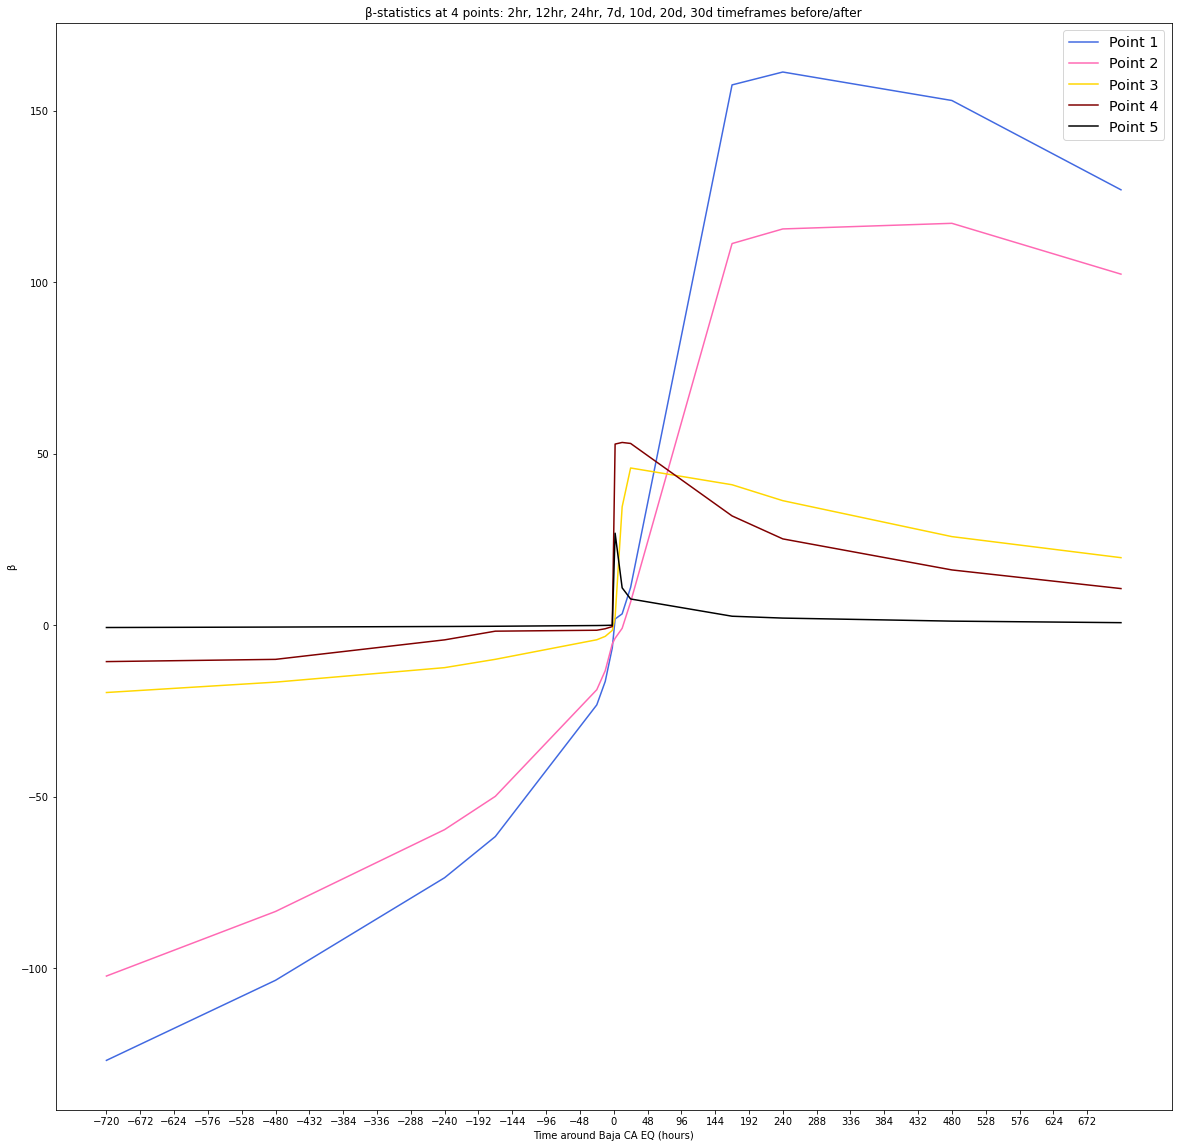

In [91]:
# Plot all timeframe βs AND cumulative seismicities

plt.figure(figsize=(20,20))

plt.plot(Point1BetasDF["Timeframe (hours around)"], Point1BetasDF.BetaStat, c = "royalblue");
plt.plot(Point2BetasDF["Timeframe (hours around)"], Point2BetasDF.BetaStat, c = "hotpink");
plt.plot(Point3BetasDF["Timeframe (hours around)"], Point3BetasDF.BetaStat, c = "gold");
plt.plot(Point4BetasDF["Timeframe (hours around)"], Point4BetasDF.BetaStat, c = "maroon");
plt.plot(Point5BetasDF["Timeframe (hours around)"], Point5BetasDF.BetaStat, c = "black");

plt.xlabel("Time around Baja CA EQ (hours)");
plt.ylabel("β");
plt.title("β-statistics at 4 points: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d timeframes before/after");
plt.xticks(np.arange(-720, 720, 48));
plt.legend(["Point 1", "Point 2", "Point 3", "Point 4", "Point 5"], fontsize = "x-large");

plt.savefig("Maps/Density Grid/β-statistics/ALLPoints_β_ALL_MoC_1", facecolor = "white");

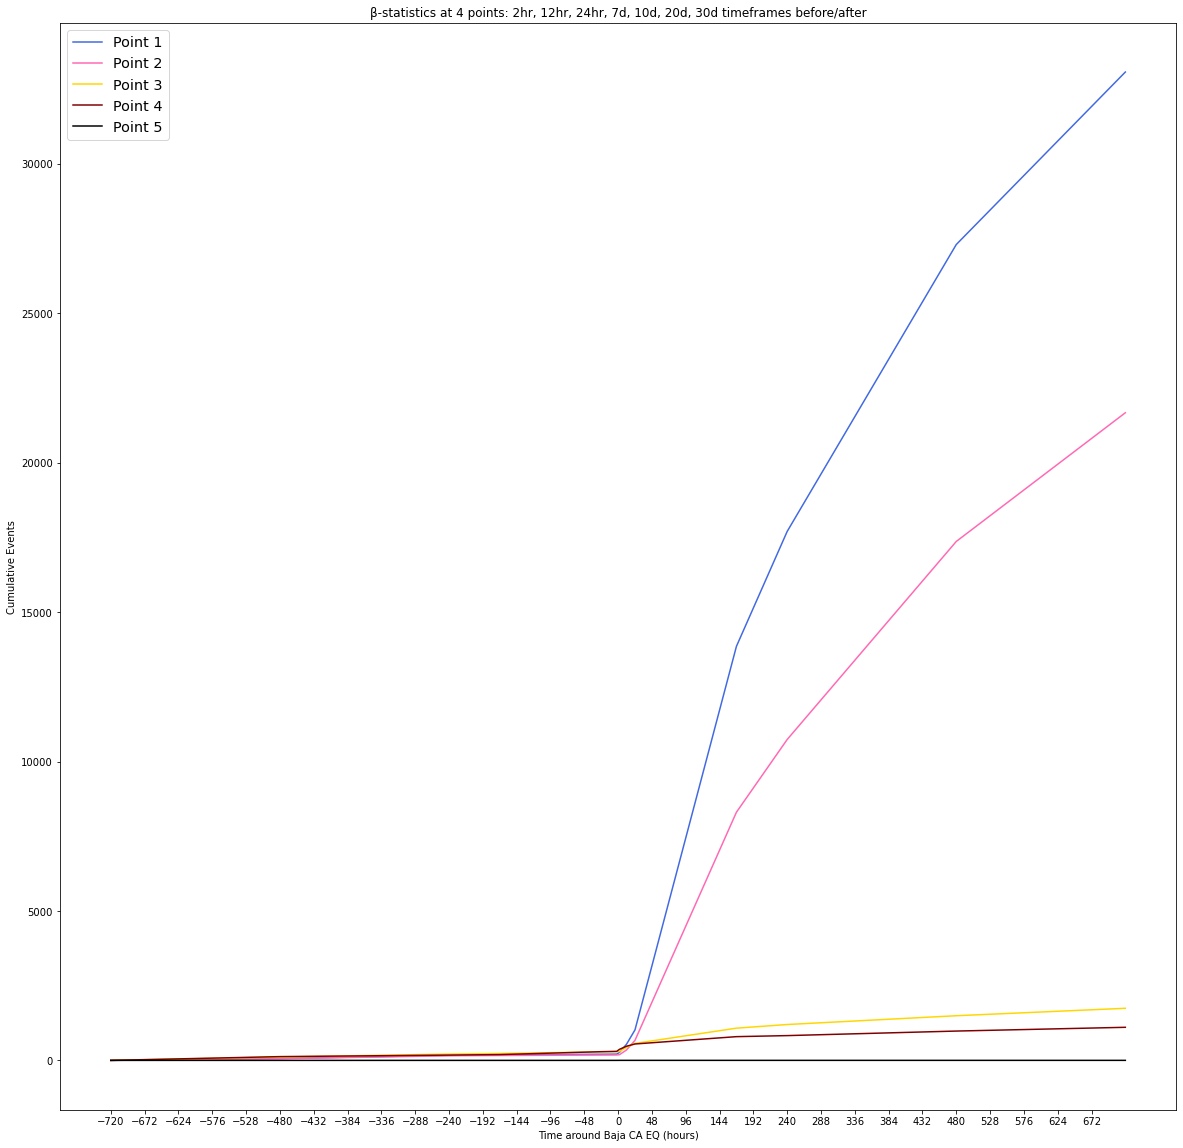

In [92]:
# Plot all timeframe βs AND cumulative seismicities

plt.figure(figsize=(20,20))

plt.plot(Point1BetasDF["Timeframe (hours around)"], Point1BetasDF["Cumulative Events"], c = "royalblue");
plt.plot(Point2BetasDF["Timeframe (hours around)"], Point2BetasDF["Cumulative Events"], c = "hotpink");
plt.plot(Point3BetasDF["Timeframe (hours around)"], Point3BetasDF["Cumulative Events"], c = "gold");
plt.plot(Point4BetasDF["Timeframe (hours around)"], Point4BetasDF["Cumulative Events"], c = "maroon");
plt.plot(Point5BetasDF["Timeframe (hours around)"], Point5BetasDF["Cumulative Events"], c = "black");

plt.xlabel("Time around Baja CA EQ (hours)");
plt.ylabel("Cumulative Events");
plt.title("β-statistics at 4 points: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d timeframes before/after");
plt.xticks(np.arange(-720, 720, 48));
plt.legend(["Point 1", "Point 2", "Point 3", "Point 4", "Point 5"], fontsize = "x-large");

plt.savefig("Maps/Density Grid/β-statistics/ALLPoints_Cumul_ALL_MoC_1", facecolor = "white");

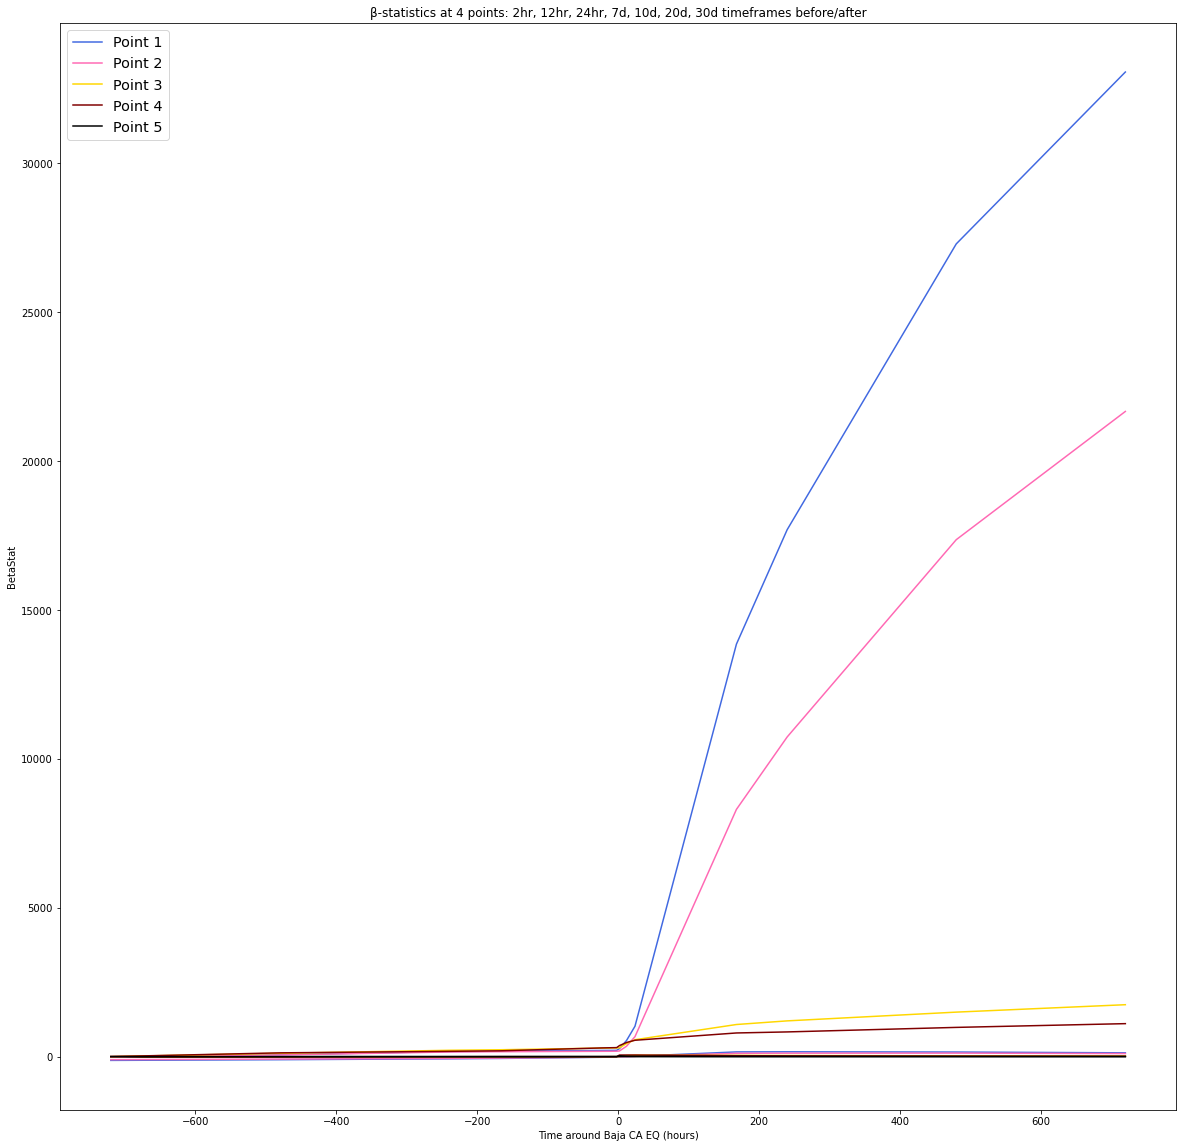

In [93]:
# Plot all timeframe βs AND cumulative seismicities

plt.figure(figsize=(20,20))

plt.plot(Point1BetasDF["Timeframe (hours around)"], Point1BetasDF.BetaStat, c = "royalblue");
plt.plot(Point2BetasDF["Timeframe (hours around)"], Point2BetasDF.BetaStat, c = "hotpink");
plt.plot(Point3BetasDF["Timeframe (hours around)"], Point3BetasDF.BetaStat, c = "gold");
plt.plot(Point4BetasDF["Timeframe (hours around)"], Point4BetasDF.BetaStat, c = "maroon");
plt.plot(Point5BetasDF["Timeframe (hours around)"], Point5BetasDF.BetaStat, c = "black");

plt.plot(Point1BetasDF["Timeframe (hours around)"], Point1BetasDF["Cumulative Events"], c = "royalblue");
plt.plot(Point2BetasDF["Timeframe (hours around)"], Point2BetasDF["Cumulative Events"], c = "hotpink");
plt.plot(Point3BetasDF["Timeframe (hours around)"], Point3BetasDF["Cumulative Events"], c = "gold");
plt.plot(Point4BetasDF["Timeframe (hours around)"], Point4BetasDF["Cumulative Events"], c = "maroon");
plt.plot(Point5BetasDF["Timeframe (hours around)"], Point5BetasDF["Cumulative Events"], c = "black");

plt.xlabel("Time around Baja CA EQ (hours)");
plt.ylabel("BetaStat");
plt.title("β-statistics at 4 points: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d timeframes before/after");
#plt.xticks(np.arange(-720, 720, 48));
plt.legend(["Point 1", "Point 2", "Point 3", "Point 4", "Point 5"], fontsize = "x-large");

plt.savefig("Maps/Density Grid/β-statistics/ALLPoints_Cumul_β_ALL_MoC_1", facecolor = "white");